In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

> Load Youtube Contents Data from Youtube API

In [2]:
# Load .csv file into a pandas DataFrame
youtube_content_df = pd.read_csv('youtube_contents_data.csv')
youtube_content_df.head()

,video_id,viewCount,likeCount,commentCount,tags,comment_anger,comment_neutral,comment_sadness,comment_disgust,comment_surprise,comment_fear,comment_happiness
0,dhLCzSwUTvc,6520134,165741,8376,"full face of flawless, flawless, flawless make...",23.785000,34.204333,9.567778,3.100000,6.160000,4.7250,62.509600
1,9rUCHq0IeK4,888530,32391,644,"james, james charles, makeup artist, mua, cute...",10.097143,47.021842,15.194000,9.822857,23.577727,6.4825,44.892258
2,Q7KdkCYto-c,2634357,50331,3001,"college, reaction, mit, harvard",15.551364,54.705238,33.400667,8.382000,13.644375,9.4875,31.940417
3,1Sq3_s7XEtU,162083,5700,307,NaN,6.503478,34.448421,30.954615,49.075000,17.156000,40.6600,53.647000
4,IFj4v7niPRI,128739,2513,135,"college, college decisions, college decisions ...",12.133529,40.393696,1.885000,7.100000,21.454643,1.5860,62.463448


In [3]:
# To find correlation between numerical columns, drop non-numerical columns
numerical_df = youtube_content_df.drop(['video_id', 'tags'], axis=1)
numerical_df.corr()

,viewCount,likeCount,commentCount,comment_anger,comment_neutral,comment_sadness,comment_disgust,comment_surprise,comment_fear,comment_happiness
viewCount,1.000000,0.929480,0.992759,0.025505,0.503352,-0.056371,0.169501,-0.461697,-0.064438,-0.432791
likeCount,0.929480,1.000000,0.962067,0.296306,0.313195,-0.089608,-0.028888,-0.533573,-0.209093,-0.266691
commentCount,0.992759,0.962067,1.000000,0.118234,0.429837,-0.060177,0.123994,-0.487487,-0.097578,-0.371467
comment_anger,0.025505,0.296306,0.118234,1.000000,-0.339841,-0.304752,-0.545894,-0.178904,-0.109529,0.381182
comment_neutral,0.503352,0.313195,0.429837,-0.339841,1.000000,0.137004,0.126523,-0.242618,0.066814,-0.887545
comment_sadness,-0.056371,-0.089608,-0.060177,-0.304752,0.137004,1.000000,0.356119,0.136762,-0.111552,-0.416563
comment_disgust,0.169501,-0.028888,0.123994,-0.545894,0.126523,0.356119,1.000000,0.169963,0.574887,-0.398348
comment_surprise,-0.461697,-0.533573,-0.487487,-0.178904,-0.242618,0.136762,0.169963,1.000000,0.345947,-0.003425
comment_fear,-0.064438,-0.209093,-0.097578,-0.109529,0.066814,-0.111552,0.574887,0.345947,1.000000,-0.264629
comment_happiness,-0.432791,-0.266691,-0.371467,0.381182,-0.887545,-0.416563,-0.398348,-0.003425,-0.264629,1.000000


> Load Youtube Overall Emotion Data Across All Modalities

In [ ]:
# Load all_audios_emotion.csv into a pandas DataFrame
all_audios_emotion_df = pd.read_csv('all_audios_emotion.csv')

# Load all_imgs_emotion.csv into a pandas DataFrame
all_imgs_emotion_df = pd.read_csv('all_imgs_emotion.csv')

# Load all_texts_emotion.csv into a pandas DataFrame
all_texts_emotion_df = pd.read_csv('all_texts_emotion.csv')

In [4]:
# Merge all DataFrames into one DataFrame
youtube_emotion_df = pd.merge(all_audios_emotion_df, all_imgs_emotion_df, on='video_id')
youtube_emotion_df.head()

,video_id,text_anger,text_disgust,text_fear,text_happiness,text_neutral,text_sadness,text_surprise,audio_anger,audio_disgust,...,audio_neutral,audio_sadness,audio_surprise,image_anger,image_disgust,image_fear,image_happiness,image_neutral,image_sadness,image_surprise
0,dhLCzSwUTvc,4.29,3.61,3.37,17.26,45.03,18.34,8.22,9.32,3.61,...,38.03,13.68,11.47,2.68,2.77,6.21,16.65,42.84,15.26,13.62
1,9rUCHq0IeK4,9.22,2.79,20.32,11.05,35.03,5.31,15.62,17.32,7.62,...,25.63,5.09,13.47,9.08,4.82,17.44,7.42,35.77,6.87,19.88
2,Q7KdkCYto-c,26.24,0.67,24.34,10.22,12.58,1.09,24.87,1.56,1.39,...,8.28,33.81,34.65,7.29,19.78,39.83,6.38,5.20,1.95,19.56
3,1Sq3_s7XEtU,6.95,5.24,17.80,44.21,16.80,8.59,0.41,7.67,17.51,...,21.55,15.85,3.67,25.64,4.97,50.68,0.16,8.69,1.21,8.65
4,IFj4v7niPRI,0.56,6.37,3.07,18.71,16.44,23.43,31.42,26.30,13.52,...,13.95,0.89,11.33,4.04,17.16,36.43,14.76,6.21,3.01,18.40
5,MuCTwxh6YaI,10.14,39.46,7.60,2.94,21.46,7.37,11.03,11.34,0.15,...,5.31,3.45,21.44,12.35,21.39,17.06,28.20,17.43,0.23,3.35
6,F4b2GiL6Xm4,6.46,20.47,5.70,25.04,7.95,33.09,1.30,18.12,1.50,...,28.41,6.89,13.80,5.46,13.05,38.05,0.74,9.84,19.83,13.02
7,FcAwKf_-06k,5.70,21.91,10.85,18.73,10.70,31.63,0.48,22.47,28.36,...,3.16,10.44,27.73,4.99,5.34,34.91,18.08,4.67,7.90,24.11
8,odzKEGe_iuk,37.87,4.38,12.25,8.88,22.72,3.59,10.31,17.35,38.73,...,15.73,10.76,11.79,54.12,14.21,0.72,0.31,16.28,11.90,2.45
9,zuG4A3_AmK0,22.66,52.90,2.31,2.69,4.71,7.34,7.38,7.87,32.94,...,7.93,0.80,7.18,11.11,6.77,21.54,23.40,7.00,17.18,13.01


> Merge Youtube Contents Data with Youtube Emotion Data Across All Modalities

In [5]:
# Merge two DataFrames
youtube_df = pd.merge(youtube_content_df, youtube_emotion_df, on='video_id')
youtube_df.head()

,video_id,viewCount,likeCount,commentCount,tags,comment_anger,comment_neutral,comment_sadness,comment_disgust,comment_surprise,...,audio_neutral,audio_sadness,audio_surprise,image_anger,image_disgust,image_fear,image_happiness,image_neutral,image_sadness,image_surprise
0,dhLCzSwUTvc,6520134,165741,8376,"full face of flawless, flawless, flawless make...",23.785000,34.204333,9.567778,3.100000,6.160000,...,38.03,13.68,11.47,2.68,2.77,6.21,16.65,42.84,15.26,13.62
1,9rUCHq0IeK4,888530,32391,644,"james, james charles, makeup artist, mua, cute...",10.097143,47.021842,15.194000,9.822857,23.577727,...,25.63,5.09,13.47,9.08,4.82,17.44,7.42,35.77,6.87,19.88
2,Q7KdkCYto-c,2634357,50331,3001,"college, reaction, mit, harvard",15.551364,54.705238,33.400667,8.382000,13.644375,...,8.28,33.81,34.65,7.29,19.78,39.83,6.38,5.20,1.95,19.56
3,1Sq3_s7XEtU,162083,5700,307,NaN,6.503478,34.448421,30.954615,49.075000,17.156000,...,21.55,15.85,3.67,25.64,4.97,50.68,0.16,8.69,1.21,8.65
4,IFj4v7niPRI,128739,2513,135,"college, college decisions, college decisions ...",12.133529,40.393696,1.885000,7.100000,21.454643,...,13.95,0.89,11.33,4.04,17.16,36.43,14.76,6.21,3.01,18.40
5,MuCTwxh6YaI,149134,3513,270,"college decisions, college decision reaction, ...",13.455556,28.876176,18.836667,5.930000,28.878077,...,5.31,3.45,21.44,12.35,21.39,17.06,28.20,17.43,0.23,3.35
6,F4b2GiL6Xm4,188267,4749,150,"college reactions, college decisions, college,...",17.378125,41.437667,1.166667,17.260000,12.689231,...,28.41,6.89,13.80,5.46,13.05,38.05,0.74,9.84,19.83,13.02
7,FcAwKf_-06k,99956,2010,120,"College decision reactions 2023, Rejected from...",10.932083,40.777027,19.906667,29.217500,43.930833,...,3.16,10.44,27.73,4.99,5.34,34.91,18.08,4.67,7.90,24.11
8,odzKEGe_iuk,10803209,143028,11182,"Gaming, REACT Gaming, Kids Vs. Food, Advice, R...",4.976250,58.086500,14.428500,36.960000,12.194348,...,15.73,10.76,11.79,54.12,14.21,0.72,0.31,16.28,11.90,2.45
9,zuG4A3_AmK0,529010,14322,524,"Steph Pappas, steph, pappas, mukbang, Steph pa...",5.414000,44.160000,16.837500,6.082500,9.639091,...,7.93,0.80,7.18,11.11,6.77,21.54,23.40,7.00,17.18,13.01


In [6]:
# Save merged_df to a new .csv file
youtube_df.to_csv('youtube_merged_data.csv', index=False)

### Youtube Contents Data Analysis

In [7]:
# Find correlation in the merged DataFrame
corr_matrix = youtube_df.drop(['video_id', 'tags'], axis=1).corr()

> Plots

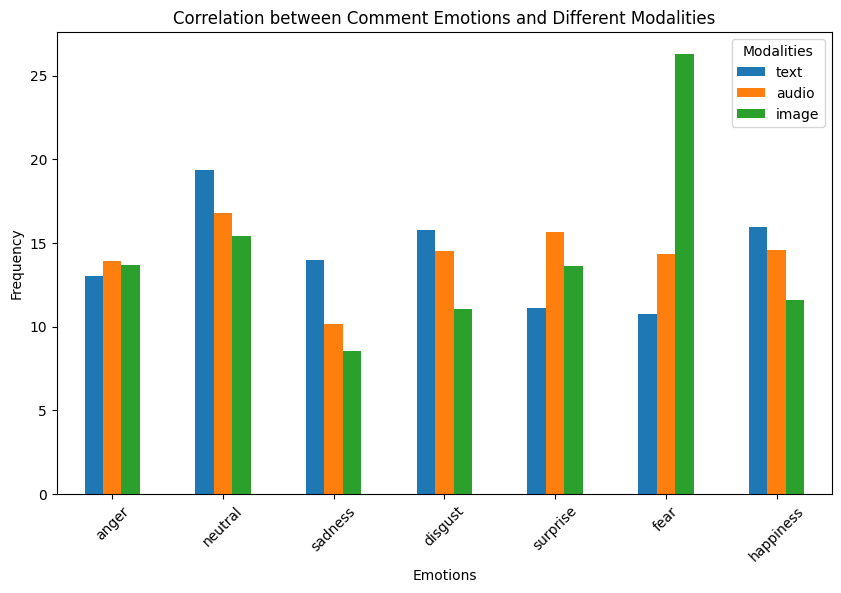

In [8]:
# Extracting emotions
emotions = [col.split('_')[1] for col in youtube_df.columns if col.startswith('comment_')]

# Creating a new DataFrame for plotting
plot_data1 = pd.DataFrame(index=emotions)

for emotion in emotions:
    for modality in ['text', 'audio', 'image']:
        col_name = f'{modality}_{emotion}'
        if col_name in youtube_df.columns:
            plot_data1.loc[emotion, modality] = youtube_df[col_name].mean()

# Plotting
plot_data1.plot(kind='bar', figsize=(10, 6))
plt.title('Correlation between Comment Emotions and Different Modalities')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Modalities')
plt.show()


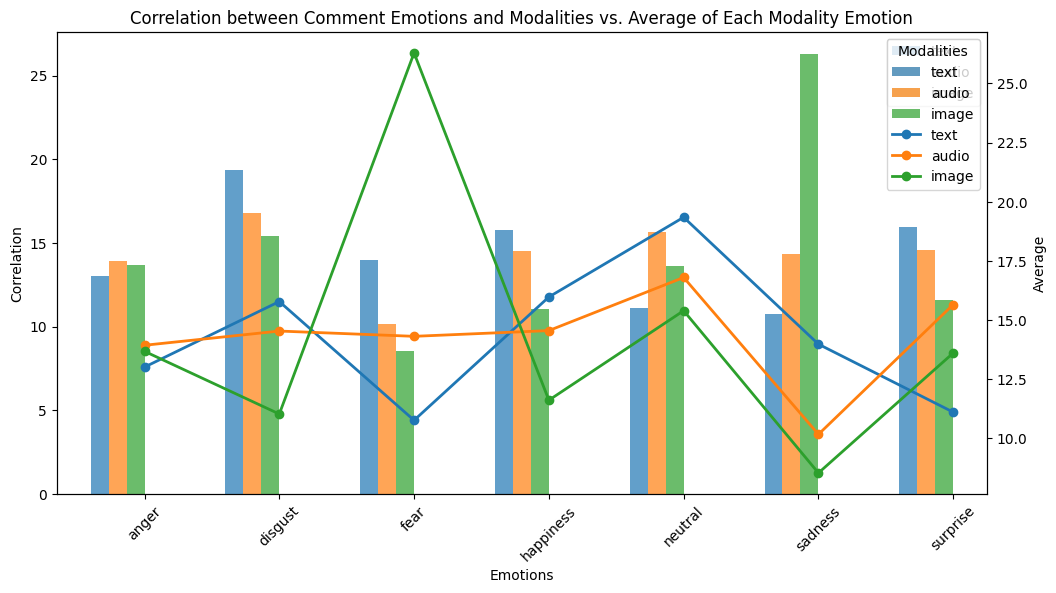

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting emotions for text modality
emotions_text = [col.split('_')[1] for col in youtube_df.columns if col.startswith('text_')]
plot_data2 = pd.DataFrame(index=emotions_text)

# Averaging each modality emotion
for modality in ['text', 'audio', 'image']:
    for emotion in emotions_text:
        col_name = f'{modality}_{emotion}'
        if col_name in youtube_df.columns:
            plot_data2.loc[emotion, modality] = youtube_df[col_name].mean()

# Extracting emotions for comment modality
emotions_comment = [col.split('_')[1] for col in youtube_df.columns if col.startswith('comment_')]
plot_data1 = pd.DataFrame(index=emotions_comment)

# Averaging correlation between comment emotions and different modalities
for emotion in emotions_comment:
    for modality in ['text', 'audio', 'image']:
        col_name = f'{modality}_{emotion}'
        if col_name in youtube_df.columns:
            plot_data1.loc[emotion, modality] = youtube_df[col_name].mean()

# Plotting both data on the same figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for correlation between comment emotions and modalities
plot_data1.plot(kind='bar', ax=ax1, width=0.4, position=1, alpha=0.7)
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Emotions')
ax1.set_title('Correlation between Comment Emotions and Modalities vs. Average of Each Modality Emotion')

# Line plot for average of each modality emotion
ax2 = ax1.twinx()  # Create a second y-axis sharing the same x-axis
plot_data2.plot(kind='line', marker='o', ax=ax2, linewidth=2)
ax2.set_ylabel('Average')

# Set the x-axis labels to the emotions from the text modality (assuming they are the same for all modalities)
ax1.set_xticklabels(emotions_text, rotation=45)

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right', title='Modalities')

plt.show()


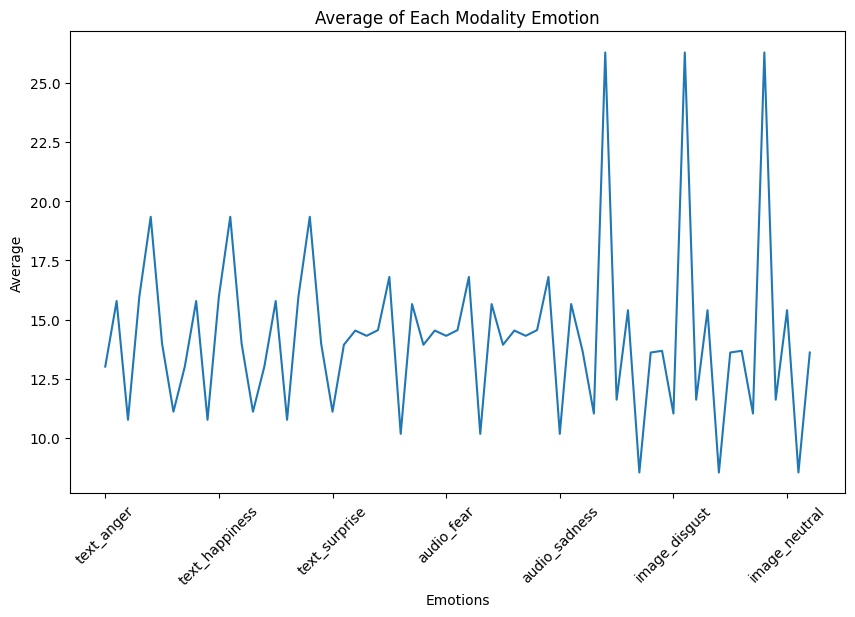

In [10]:
# Extracting emotions
emotions = [col.split('_')[1] for col in youtube_df.columns if col.startswith('text_') or col.startswith('audio_') or col.startswith('image_')]
plot_data = youtube_df[[f'{modality}_{emotion}' for modality in ['text', 'audio', 'image'] for emotion in emotions]].mean()

# Plotting
plot_data.plot(kind='line', figsize=(10, 6))
plt.title('Average of Each Modality Emotion')
plt.xlabel('Emotions')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.show()

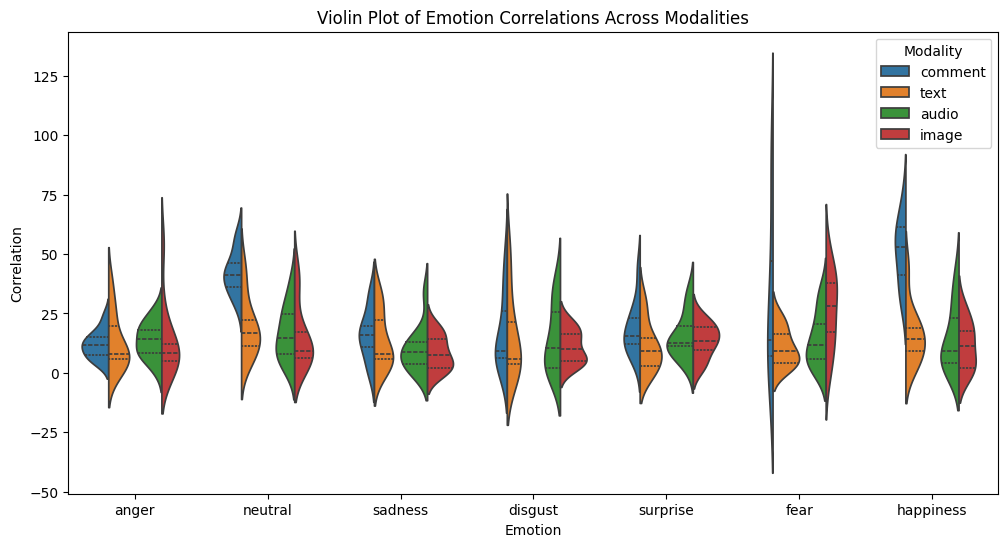

In [11]:
# Filter the DataFrame to include only emotion-related columns
emotions_df = youtube_df.filter(regex='^(text|audio|image|comment)_')

# Melting the DataFrame for easier plotting
melted_df = pd.melt(emotions_df, var_name='Category', value_name='Correlation')

# Extracting modality and emotion into separate columns
melted_df['Modality'] = melted_df['Category'].apply(lambda x: x.split('_')[0])
melted_df['Emotion'] = melted_df['Category'].apply(lambda x: x.split('_')[1])

# Plotting the violin plot across different emotions for each modality
plt.figure(figsize=(12, 6))
sns.violinplot(x='Emotion', y='Correlation', hue='Modality', data=melted_df, split=True, inner='quart')
plt.title('Violin Plot of Emotion Correlations Across Modalities')
plt.legend(title='Modality')
plt.show()

> Content Features vs Emotions (Text, Audio, Image)

In [12]:
content_features = ["video_id", "viewCount", "likeCount", "commentCount", "tags"]
content_df = youtube_df[content_features]
content_df.head()

,video_id,viewCount,likeCount,commentCount,tags
0,dhLCzSwUTvc,6520134,165741,8376,"full face of flawless, flawless, flawless make..."
1,9rUCHq0IeK4,888530,32391,644,"james, james charles, makeup artist, mua, cute..."
2,Q7KdkCYto-c,2634357,50331,3001,"college, reaction, mit, harvard"
3,1Sq3_s7XEtU,162083,5700,307,NaN
4,IFj4v7niPRI,128739,2513,135,"college, college decisions, college decisions ..."


> Emotion Analysis

In [13]:
# Load data from youtube_merged_data.csv
youtube_merged_df = pd.read_csv('youtube_merged_data.csv')
youtube_merged_df.head()

,video_id,viewCount,likeCount,commentCount,tags,comment_anger,comment_neutral,comment_sadness,comment_disgust,comment_surprise,...,audio_neutral,audio_sadness,audio_surprise,image_anger,image_disgust,image_fear,image_happiness,image_neutral,image_sadness,image_surprise
0,dhLCzSwUTvc,6520134,165741,8376,"full face of flawless, flawless, flawless make...",23.785000,34.204333,9.567778,3.100000,6.160000,...,38.03,13.68,11.47,2.68,2.77,6.21,16.65,42.84,15.26,13.62
1,9rUCHq0IeK4,888530,32391,644,"james, james charles, makeup artist, mua, cute...",10.097143,47.021842,15.194000,9.822857,23.577727,...,25.63,5.09,13.47,9.08,4.82,17.44,7.42,35.77,6.87,19.88
2,Q7KdkCYto-c,2634357,50331,3001,"college, reaction, mit, harvard",15.551364,54.705238,33.400667,8.382000,13.644375,...,8.28,33.81,34.65,7.29,19.78,39.83,6.38,5.20,1.95,19.56
3,1Sq3_s7XEtU,162083,5700,307,NaN,6.503478,34.448421,30.954615,49.075000,17.156000,...,21.55,15.85,3.67,25.64,4.97,50.68,0.16,8.69,1.21,8.65
4,IFj4v7niPRI,128739,2513,135,"college, college decisions, college decisions ...",12.133529,40.393696,1.885000,7.100000,21.454643,...,13.95,0.89,11.33,4.04,17.16,36.43,14.76,6.21,3.01,18.40


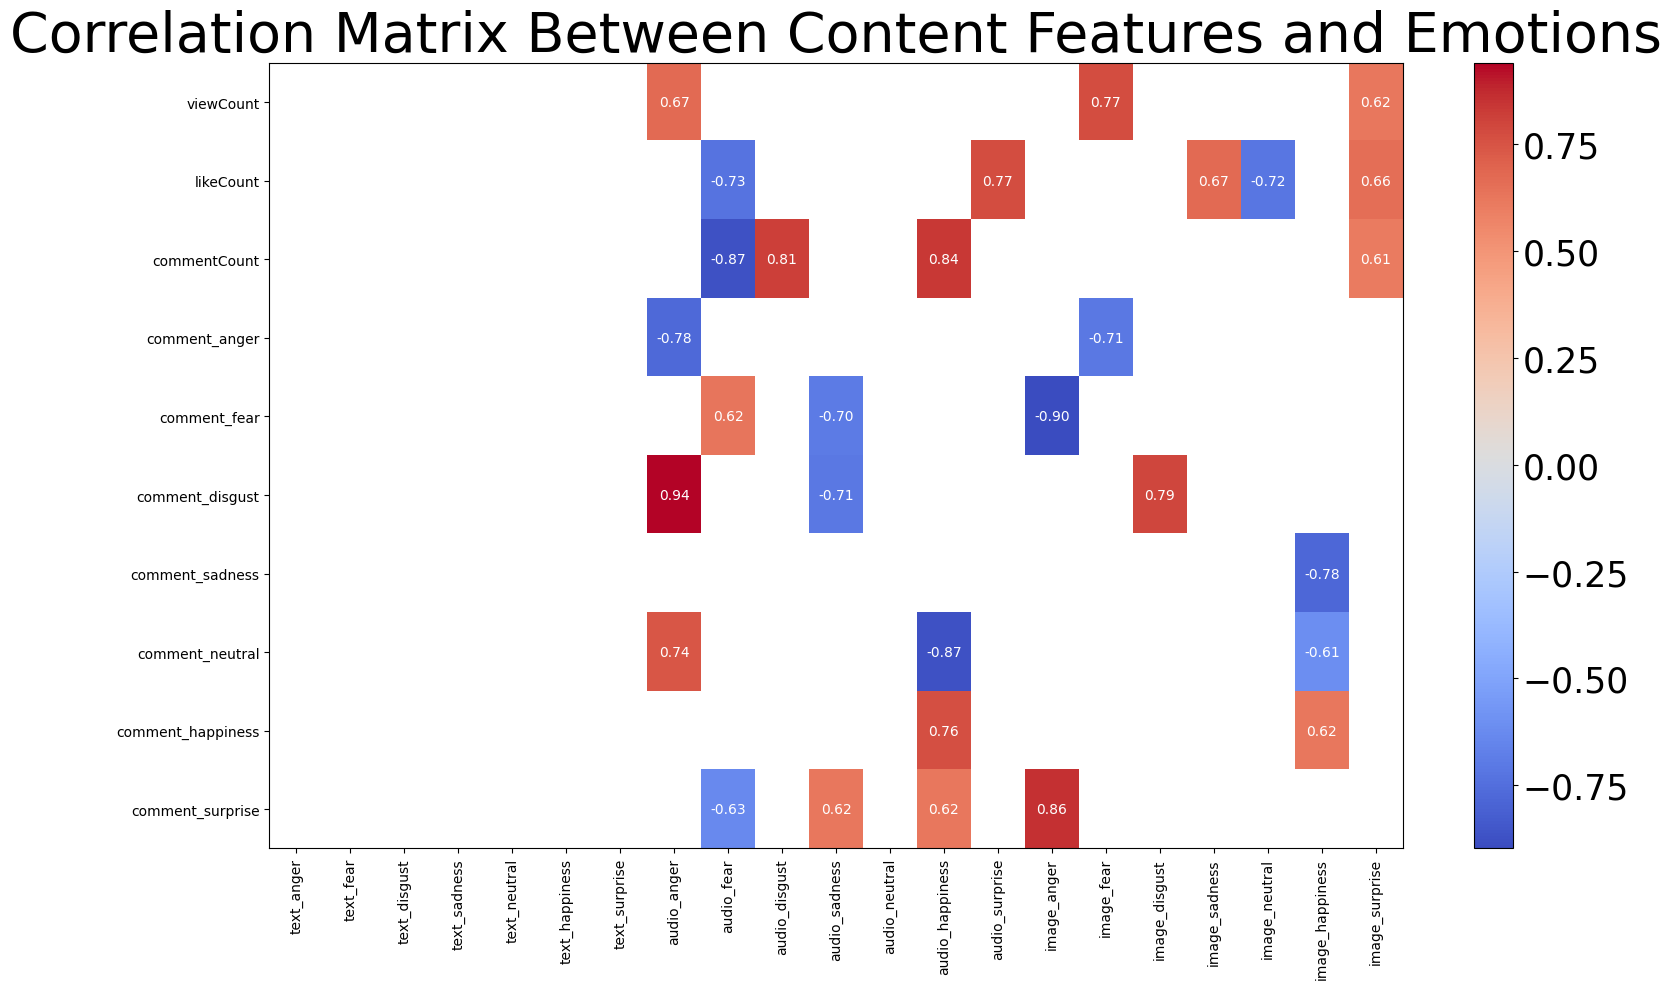

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Find correlation in the merged DataFrame
corr_matrix = youtube_merged_df.drop(['video_id', 'tags'], axis=1).corr()

# Filter columns for the x-axis
filtered_rows = corr_matrix.columns[~corr_matrix.columns.str.startswith(('text_', 'image_', 'audio_'))]

# Filter rows (keeping only those that start with "text_", "image_", or "audio_") for the y-axis
filtered_columns = corr_matrix.index[corr_matrix.index.str.startswith(('text_', 'image_', 'audio_'))]

# Create the filtered correlation matrix
filtered_corr_matrix = corr_matrix.loc[filtered_rows, filtered_columns]

# Assuming filtered_corr_matrix is your correlation matrix
threshold = 0.60
max_threshold = 0.9  # Define the maximum threshold

# Create the mask
mask = (filtered_corr_matrix.values < threshold) & (filtered_corr_matrix.values > -threshold) 

# Apply the mask to filter values greater than 0.9
filtered_values = np.ma.masked_where(mask, filtered_corr_matrix.values)

plt.figure(figsize=(16, 10))
img = plt.imshow(filtered_values, cmap='coolwarm', interpolation='nearest', aspect='auto')

# Add text annotations for correlation values
for i in range(filtered_values.shape[0]):
    for j in range(filtered_values.shape[1]):
        if not mask[i, j]:
            text = plt.text(j, i, f"{filtered_values[i, j]:.2f}",
                            ha="center", va="center", color="w")

# Set the y-axis labels to the filtered rows and x-axis labels to the filtered columns
plt.yticks(ticks=range(len(filtered_rows)), labels=filtered_rows)
plt.xticks(ticks=range(len(filtered_columns)), labels=filtered_columns, rotation=90)

# Make title size larger

# Change font to white
plt.rcParams.update({
    'text.color': "black",
    'axes.labelcolor': "black",
    'axes.edgecolor': 'black',
    'xtick.color': "black",
    'ytick.color': "black",
    'legend.edgecolor': 'black',
    'legend.facecolor': 'none',
    'legend.fontsize': 14,
    'axes.titlesize': 40,
    'xtick.labelsize': 25,
    'ytick.labelsize': 25
})

plt.colorbar(img)
plt.title('Correlation Matrix Between Content Features and Emotions')

# fit the layout
plt.tight_layout()

plt.savefig("heatmap.png", transparent=True)

plt.show()

> Bar Plot

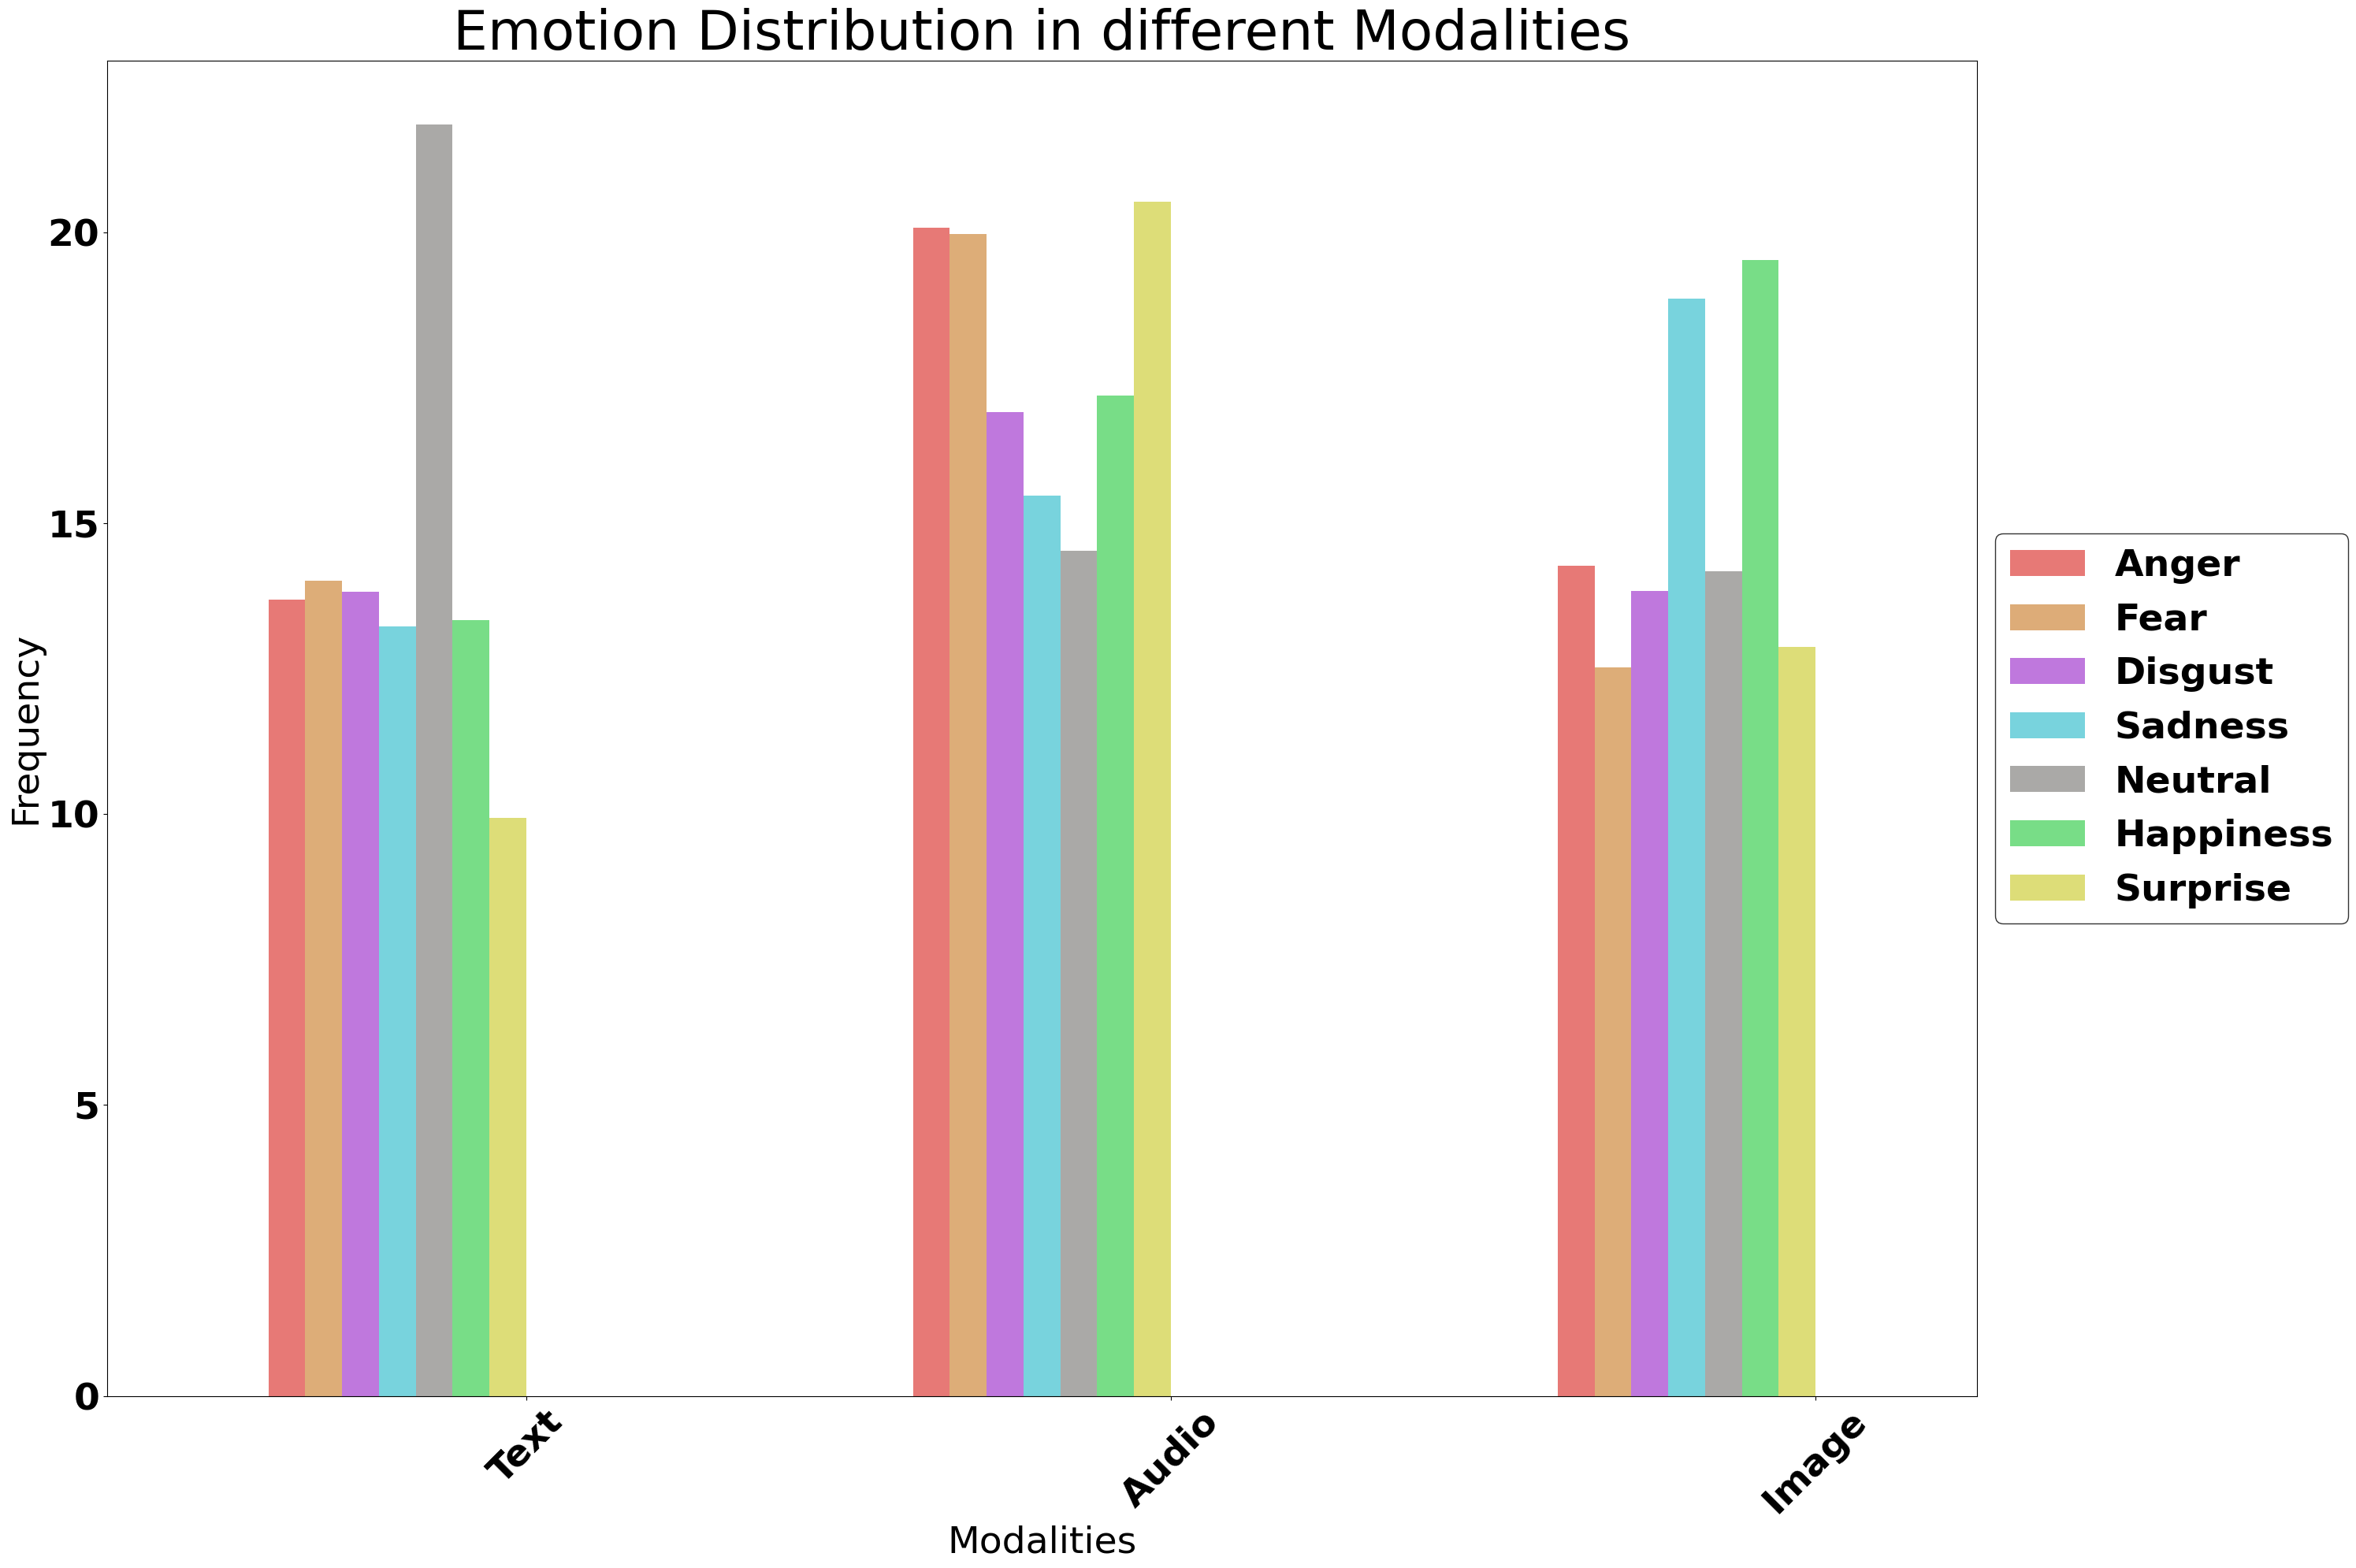

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the order and colors for the emotions
emotion_order = ['anger', 'fear', 'disgust', 'sadness', 'neutral', 'happiness', 'surprise']
emotion_colors = {
    'anger': (221/255, 65/255, 60/255),
    'fear': (207/255, 138/255, 63/255),
    'disgust': (164/255, 63/255, 207/255),
    'sadness': (63/255, 193/255, 207/255),
    'neutral': (135/255, 133/255, 130/255),
    'happiness': (63/255, 207/255, 85/255),
    'surprise': (207/255, 207/255, 63/255)
}

# Extracting emotions for text modality
emotions_text = [col.split('_')[1] for col in youtube_merged_df.columns if col.startswith('text_')]
plot_data2 = pd.DataFrame(columns=['text', 'audio', 'image'], index=emotion_order)

# Averaging each modality emotion
for modality in ['text', 'audio', 'image']:
    for emotion in emotions_text:
        col_name = f'{modality}_{emotion}'
        if col_name in youtube_merged_df.columns:
            plot_data2.loc[emotion, modality] = youtube_merged_df[col_name].mean()

# Extracting emotions for comment modality
emotions_comment = [col.split('_')[1] for col in youtube_merged_df.columns if col.startswith('comment_')]
plot_data1 = pd.DataFrame(columns=['text', 'audio', 'image'], index=emotion_order)

# Averaging correlation between comment emotions and different modalities
for emotion in emotions_comment:
    for modality in ['text', 'audio', 'image']:
        col_name = f'{modality}_{emotion}'
        if col_name in youtube_merged_df.columns:
            plot_data1.loc[emotion, modality] = youtube_merged_df[col_name].mean()

# Plotting both data in one figure
fig, ax1 = plt.subplots(figsize=(30, 20))
fig.patch.set_alpha(0)

# Bar plot for correlation between comment emotions and modalities
plot_data1.T.plot(kind='bar', ax=ax1, width=0.4, position=1, alpha=0.7, color=[emotion_colors[emotion] for emotion in emotion_order])
ax1.set_ylabel('Frequency', fontdict={'fontsize':34})
ax1.set_xlabel('Modalities', fontdict={'fontsize':34})
ax1.set_title('Emotion Distribution in different Modalities', fontdict={'fontsize':50})

# Set the x-axis labels to the modalities
ax1.set_xticklabels(['Text', 'Audio', 'Image'], rotation=45)

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right', title='Emotions'
)

# Change font to white
plt.rcParams.update({
    'text.color': "black",
    'axes.labelcolor': "black",
    'axes.edgecolor': 'black',
    'xtick.color': "black",
    'ytick.color': "black",
    'legend.edgecolor': 'black',
    'legend.facecolor': 'none',
    'legend.fontsize': 34,
    'axes.titlesize': 40,
    'xtick.labelsize': 34,
    'ytick.labelsize': 34
})

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Capitalize the legend labels and x-axis labels
for label in ax1.get_xticklabels():
    label.set_fontsize(34)
    label.set_fontweight('bold')
for label in ax1.get_yticklabels():
    label.set_fontsize(34)
    label.set_fontweight('bold')
for label in ax1.get_legend().get_texts():
    label.set_text(label.get_text().capitalize())
    label.set_fontsize(34)
    label.set_fontweight('bold')

# fit the layout
plt.tight_layout()

plt.savefig("comment-modality-barplot.png", transparent=True)
plt.show()


> Findings

Heatmap (Correlation Plot)
- Content features are positively correlated with the emotions present in videos in general
- The viewers are more likely to relate with the emotions conveyed through Image and audio. (Even though the viewers don’t understand the language in a videos they can still relate to the emotions in the video)
- Intense emotions are positively correlated with the content features

Bar Plot
- Our text detection model identified neutral emotions more frequently
- Surprise, anger, and fear are often more easily detected through audio analysis
- Happiness and sadness are more easily detected through image analysis
- Surprise, Fear, and Anger are more frequently detected through audio analysis